### Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/300/'

os.chdir(current_path)

Mounted at /content/drive


### Load data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(current_path)


interval = '30m'
# interval = '5m'
date_path = './candlestick_concated/%s/2021-04-27/' % interval
# date_path = './candlestick_concated/%s/2021-06-17/' % interval
file_list = os.listdir(date_path)

print((file_list))

['2021-04-27 BTCUSDT.xlsx', '2021-04-27 ETHUSDT.xlsx', '2021-04-27 BCHUSDT.xlsx', '2021-04-27 XRPUSDT.xlsx', '2021-04-27 EOSUSDT.xlsx', '2021-04-27 LTCUSDT.xlsx', '2021-04-27 ETCUSDT.xlsx', '2021-04-27 LINKUSDT.xlsx', '2021-04-27 XLMUSDT.xlsx', '2021-04-27 ADAUSDT.xlsx', '2021-04-27 XMRUSDT.xlsx', '2021-04-27 SXPUSDT.xlsx', '2021-04-27 KAVAUSDT.xlsx', '2021-04-27 BANDUSDT.xlsx', '2021-04-27 DASHUSDT.xlsx', '2021-04-27 ZECUSDT.xlsx', '2021-04-27 XTZUSDT.xlsx', '2021-04-27 BNBUSDT.xlsx', '2021-04-27 ATOMUSDT.xlsx', '2021-04-27 ONTUSDT.xlsx', '2021-04-27 IOTAUSDT.xlsx', '2021-04-27 BATUSDT.xlsx', '2021-04-27 NEOUSDT.xlsx', '2021-04-27 QTUMUSDT.xlsx', '2021-04-27 WAVESUSDT.xlsx', '2021-04-27 MKRUSDT.xlsx', '2021-04-27 SNXUSDT.xlsx', '2021-04-27 DOTUSDT.xlsx', '2021-04-27 THETAUSDT.xlsx', '2021-04-27 ALGOUSDT.xlsx', '2021-04-27 KNCUSDT.xlsx', '2021-04-27 ZRXUSDT.xlsx', '2021-04-27 COMPUSDT.xlsx', '2021-04-27 OMGUSDT.xlsx']


### Win ratio improvement

start_stamp : 0
len(ohlcv) : 18048


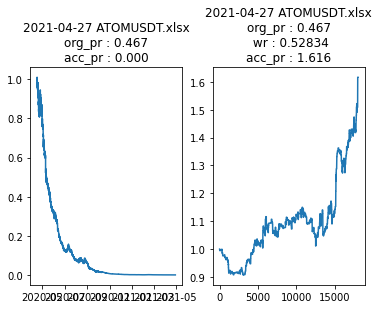

In [11]:

from funcs_indicator import *
import matplotlib.pyplot as plt

# import mpl_finance as mf


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

long_index = 0
leverage = 5
prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 5
lvrg = 1

for i in range(len(candis)):

  keys = [candis[i]]

  if 'ATOM'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

        
    #       long      #
    # print(ohlcv['close'].pct_change())
    # break

    # long_pr = 

    pr = (ohlcv['close'].pct_change() - fee) * lvrg + 1

    #       short       #
    s_pr = (-ohlcv['close'].pct_change() - fee) * lvrg + 1


    org_wr = len(pr[pr > 1]) / len(pr[pr != 1])

    # plt.subplot(141)
    plt.subplot(121)
    plt.plot(np.cumprod(pr))
    plt.title("%s\norg_pr : %.3f\nacc_pr : %.3f" % (key, org_wr, np.cumprod(pr)[-1]))


    #         inversion         #
    # rev_np_pr = (1 / (pr + fee + 1) - fee - 1) * lvrg + 1
        
    # rev_total_pr = np.cumprod(rev_np_pr)
    # rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    # plt.subplot(142)
    # plt.plot(np.cumprod(pr))
    # plt.title("%s\norg_pr : %.3f\nacc_pr : %.3f" % (key, org_wr, np.cumprod(pr)[-1]))

    #                    strat                   #

    # strat_pr = np.where((ohlcv['close'].shift(1) < ohlcv['close'].shift(2)) & 
    #                     (ohlcv['close'].shift(2) < ohlcv['close'].shift(3)), pr, 1)


    # strat_pr = np.where((ohlcv['close'].shift(1) < ohlcv['close'].shift(2)) & 
    #                     (ohlcv['close'].shift(2) > ohlcv['close'].shift(3)) & 
    #                     (ohlcv['close'].shift(3) > ohlcv['close'].shift(4)) & 
    #                     (ohlcv['close'].shift(4) < ohlcv['close'].shift(5)), pr, 1)

    strat_pr = np.where((ohlcv['close'].shift(1) < ohlcv['close'].shift(2)) & 
                        (ohlcv['close'].shift(2) > ohlcv['close'].shift(3)) & 
                        (ohlcv['close'].shift(3) > ohlcv['close'].shift(4)) & 
                        (ohlcv['close'].shift(4) < ohlcv['close'].shift(5)) & 
                        (ohlcv['close'].shift(5) < ohlcv['close'].shift(6)), pr, 1)
    
    # strat_pr = np.where((ohlcv['close'].shift(1) < ohlcv['close'].shift(2)) & 
    #                     (ohlcv['close'].shift(2) < ohlcv['close'].shift(3)) & 
    #                     (ohlcv['close'].shift(3) < ohlcv['close'].shift(4)) & 
    #                     (ohlcv['close'].shift(4) > ohlcv['close'].shift(5)) & 
    #                     (ohlcv['close'].shift(5) > ohlcv['close'].shift(6)), pr, 1)

    # strat_pr = np.where((ohlcv['close'].shift(1) < ohlcv['close'].shift(2)) & 
    #                     (ohlcv['close'].shift(2) > ohlcv['close'].shift(3)) & 
    #                     (ohlcv['close'].shift(3) > ohlcv['close'].shift(4)) & 
    #                     (ohlcv['close'].shift(4) < ohlcv['close'].shift(5)) & 
    #                     (ohlcv['close'].shift(5) > ohlcv['close'].shift(6)) & 
    #                     (ohlcv['close'].shift(6) < ohlcv['close'].shift(7)), pr, 1)
    
    # strat_pr = np.where((ohlcv['high'].shift(2) > ohlcv['high'].shift(3))& 
    #                     (ohlcv['close'].shift(1) > ohlcv['close'].shift(2)), pr, 1)
    
    # strat_pr = np.where((ohlcv['high'].shift(1) > ohlcv['high'].shift(2)), pr, 1)
    
    # strat_pr = np.where((ohlcv['close'].shift(1) < ohlcv['close'].shift(2)), pr, 1)

    # strat_pr = np.where((ohlcv['low'].shift(1) < ohlcv['low'].shift(2))& 
    #                     (ohlcv['high'].shift(1) > ohlcv['high'].shift(2)), pr, 1)


    wr = len(strat_pr[strat_pr > 1]) / len(strat_pr[strat_pr != 1])

    plt.subplot(122)
    plt.plot(np.cumprod(strat_pr))
    plt.title("%s\norg_pr : %.3f\n wr : %.5f\nacc_pr : %.3f" % (key, org_wr, wr, np.cumprod(strat_pr)[-1]))




    #       inversion       #
    # np_pr = (np.array(pr_list) - 1) * lvrg + 1

    # total_pr = np.cumprod(np_pr)
    # wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

    # plt.subplot(121)
    # plt.plot(total_pr)
    # plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (wr, np.min(np_pr), total_pr[-1], lvrg))
    # # plt.show()


    # #     reversion adjustment      #
    # rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
        
    # rev_total_pr = np.cumprod(rev_np_pr)
    # rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

    # plt.subplot(122)
    # plt.plot(rev_total_pr)
    # plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))
    # plt.show()
    # #                  sl cut                #
    # sl_line = ohlcv['low'].rolling(250).min().shift(1)
    # # sl_line = ohlcv['low'].shift(1)

    # strat_pr_sl = np.where((strat_pr != 1) & (sl_line > ohlcv['low']), 
    #                      1 + lvrg * (sl_line / ohlcv['close'].shift(1) - 1 - fee), strat_pr)


    # wr_sl = len(strat_pr_sl[strat_pr_sl > 1]) / len(strat_pr_sl[strat_pr_sl != 1])
    # # wl_pr_ratio = np.mean(strat_pr[strat_pr > 1]) / np.mean(strat_pr[strat_pr < 1])
    # # wl_pr_ratio = np.cumprod(strat_pr[strat_pr > 1])[-1] / np.cumprod(strat_pr[strat_pr < 1])[-1]

    # plt.subplot(122)
    # plt.plot(np.cumprod(strat_pr_sl))
    # plt.title("%s\norg_pr : %.3f\n wr : %.5f\nacc_pr : %.3f" % (key, org_wr, wr_sl, np.cumprod(strat_pr_sl)[-1]))




    plt.show()



### Profit check by win ratio

In [ ]:
#     70 % -> select upper 0
#     30 % -> select lower 0

# print(down_size / (up_size + down_size))
# break
# print(len(pr))
# print(len(pr[pr > 1]))
# print(len(pr[pr < 1]))
# print(len(pr[pr < 1]) + len(pr[pr > 1]))

import random
from tqdm.notebook import tqdm

win_ratio = 0.7

t_pr_list = []

for win_ratio in tqdm(np.arange(0.5, 0.7, 0.01)):
# for win_ratio in [0.65]:

  # up_size = len(pr[pr > 1])
  up_size = int(len(pr[pr > 1]) / 5)
  down_size = up_size / win_ratio * (1 - win_ratio)

  up = pr[pr > 1].values
  np.random.shuffle(up)

  down = pr[pr < 1].values
  np.random.shuffle(down)


  up2 = up[:up_size]
  down2 = down[:int(down_size)]

  total_pr = np.hstack((up2, down2))
  np.random.shuffle(total_pr)
  
  wl_pr_ratio = np.mean(up2) * np.mean(down2)


  plt.plot(np.cumprod(total_pr))
  plt.title("%s\nwr : %.3f\n wl_pr_ratio : %.6f" % (key, win_ratio, wl_pr_ratio))
  plt.show()

  t_pr_list.append(np.cumprod(total_pr)[-1])

plt.plot(np.arange(0.5, 0.7, 0.01), t_pr_list)
plt.show()


In [ ]:
win_ratio = 0.51

up_size = len(pr[pr > 1])
down_size = up_size / win_ratio * (1 - win_ratio)

up = pr[pr > 1].values
np.random.shuffle(up)

down = pr[pr < 1].values
np.random.shuffle(down)


up2 = up[:up_size]
down2 = down[:int(down_size)]

total_pr = np.hstack((up2, down2))
np.random.shuffle(total_pr)
plt.plot(np.cumprod(total_pr))
plt.title("wr : %.3f" % win_ratio)
plt.show()